In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
import sklearn
print(sklearn.__version__)

1.5.2


In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
dt1 = pd.read_csv("C:/Users/rsing/Downloads/parkinsons.csv")
dt1.head(10)

,name,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_%,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
dt1.status.value_counts()

status
1    147
0     48
Name: count, dtype: int64

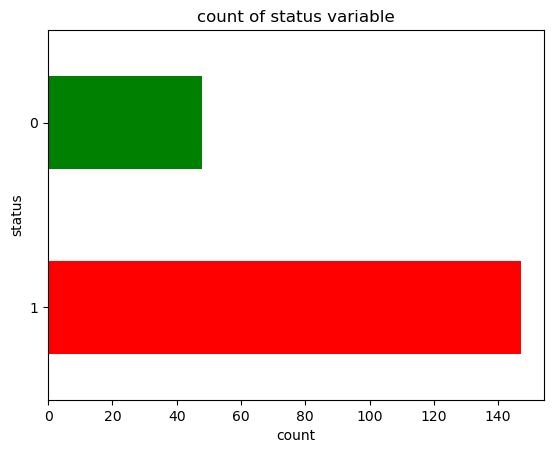

In [6]:
color = ['red', 'green']
dt1.status.value_counts().plot(kind='barh', color=color)
plt.xlabel('count')
plt.ylabel('status')
plt.title('count of status variable')
plt.show()

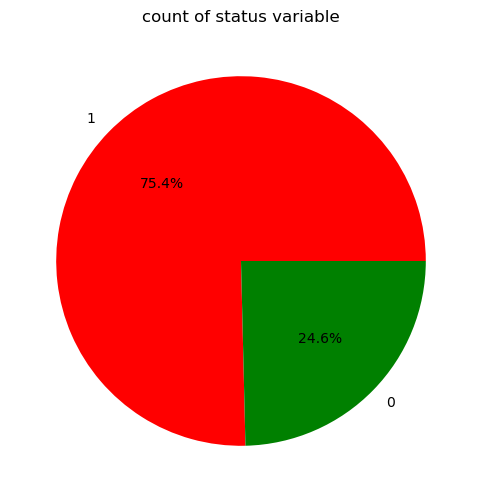

In [7]:
plt.figure(figsize=(10,6))
color = ['red', 'green']
dt1.status.value_counts().plot(kind='pie', colors=color, autopct='%1.1f%%')
plt.ylabel('')
plt.title('count of status variable')
plt.show()

In [8]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             195 non-null    object 
 1   MDVP_Fo_Hz       195 non-null    float64
 2   MDVP_Fhi_Hz      195 non-null    float64
 3   MDVP_Flo_Hz      195 non-null    float64
 4   MDVP_Jitter_%    195 non-null    float64
 5   MDVP_Jitter_Abs  195 non-null    float64
 6   MDVP_RAP         195 non-null    float64
 7   MDVP_PPQ         195 non-null    float64
 8   Jitter_DDP       195 non-null    float64
 9   MDVP_Shimmer     195 non-null    float64
 10  MDVP_Shimmer_dB  195 non-null    float64
 11  Shimmer_APQ3     195 non-null    float64
 12  Shimmer_APQ5     195 non-null    float64
 13  MDVP_APQ         195 non-null    float64
 14  Shimmer_DDA      195 non-null    float64
 15  NHR              195 non-null    float64
 16  HNR              195 non-null    float64
 17  status          

In [9]:
dt1.describe()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_%,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
dt1.isnull().sum()

name               0
MDVP_Fo_Hz         0
MDVP_Fhi_Hz        0
MDVP_Flo_Hz        0
MDVP_Jitter_%      0
MDVP_Jitter_Abs    0
MDVP_RAP           0
MDVP_PPQ           0
Jitter_DDP         0
MDVP_Shimmer       0
MDVP_Shimmer_dB    0
Shimmer_APQ3       0
Shimmer_APQ5       0
MDVP_APQ           0
Shimmer_DDA        0
NHR                0
HNR                0
status             0
RPDE               0
DFA                0
spread1            0
spread2            0
D2                 0
PPE                0
dtype: int64

In [11]:
dt1=dt1.drop(columns=['name'], axis=1)
dt1.head()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_%,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'MDVP_Fo_Hz'),
  Text(1, 0, 'MDVP_Fhi_Hz'),
  Text(2, 0, 'MDVP_Flo_Hz'),
  Text(3, 0, 'MDVP_Jitter_%'),
  Text(4, 0, 'MDVP_Jitter_Abs'),
  Text(5, 0, 'MDVP_RAP'),
  Text(6, 0, 'MDVP_PPQ'),
  Text(7, 0, 'Jitter_DDP'),
  Text(8, 0, 'MDVP_Shimmer'),
  Text(9, 0, 'MDVP_Shimmer_dB'),
  Text(10, 0, 'Shimmer_APQ3'),
  Text(11, 0, 'Shimmer_APQ5'),
  Text(12, 0, 'MDVP_APQ'),
  Text(13, 0, 'Shimmer_DDA'),
  Text(14, 0, 'NHR'),
  Text(15, 0, 'HNR'),
  Text(16, 0, 'status'),
  Text(17, 0, 'RPDE'),
  Text(18, 0, 'DFA'),
  Text(19, 0, 'spread1'),
  Text(20, 0, 'spread2'),
  Text(21, 0, 'D2'),
  Text(22, 0, 'PPE')])

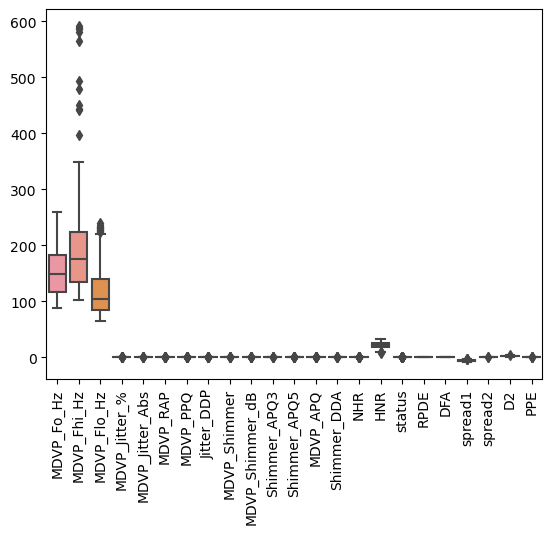

In [12]:
sns.boxplot(data=dt1)
plt.xticks(rotation=90)

In [13]:
dt1.MDVP_Fhi_Hz.value_counts()

MDVP_Fhi_Hz
157.302    1
191.759    1
195.107    1
198.109    1
197.238    1
          ..
166.607    1
162.215    1
162.824    1
162.408    1
260.277    1
Name: count, Length: 195, dtype: int64

<Axes: >

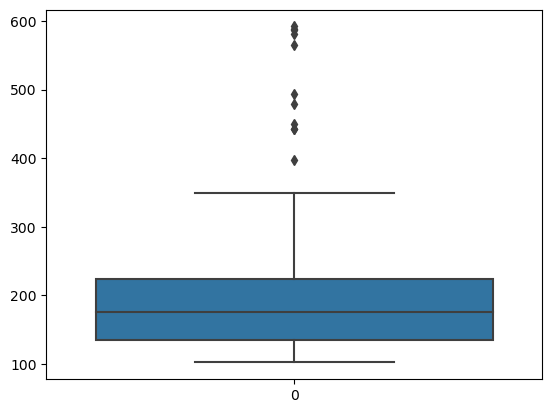

In [14]:
sns.boxplot(dt1.MDVP_Fhi_Hz)

<Axes: >

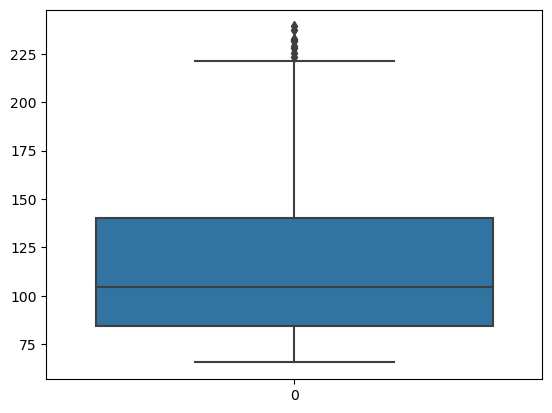

In [15]:
sns.boxplot(dt1.MDVP_Flo_Hz)

In [16]:
dt1.status.value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [17]:
for i in dt1:
    if dt1[i].dtype == np.float64:
        q1 = dt1[i].quantile(0.25)
        q3 = dt1[i].quantile(0.75)
        iqr= q3-q1
        u1 = q3+1.5*iqr
        l1 = q1-1.5*iqr
        dt1[i].clip(lower=l1, upper=u1, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'MDVP_Fo_Hz'),
  Text(1, 0, 'MDVP_Fhi_Hz'),
  Text(2, 0, 'MDVP_Flo_Hz'),
  Text(3, 0, 'MDVP_Jitter_%'),
  Text(4, 0, 'MDVP_Jitter_Abs'),
  Text(5, 0, 'MDVP_RAP'),
  Text(6, 0, 'MDVP_PPQ'),
  Text(7, 0, 'Jitter_DDP'),
  Text(8, 0, 'MDVP_Shimmer'),
  Text(9, 0, 'MDVP_Shimmer_dB'),
  Text(10, 0, 'Shimmer_APQ3'),
  Text(11, 0, 'Shimmer_APQ5'),
  Text(12, 0, 'MDVP_APQ'),
  Text(13, 0, 'Shimmer_DDA'),
  Text(14, 0, 'NHR'),
  Text(15, 0, 'HNR'),
  Text(16, 0, 'status'),
  Text(17, 0, 'RPDE'),
  Text(18, 0, 'DFA'),
  Text(19, 0, 'spread1'),
  Text(20, 0, 'spread2'),
  Text(21, 0, 'D2'),
  Text(22, 0, 'PPE')])

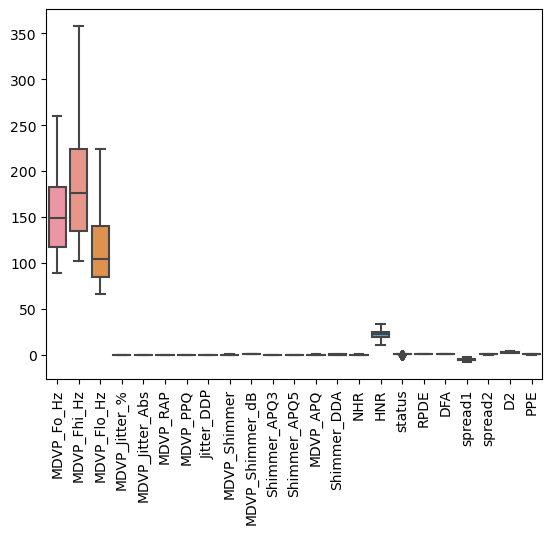

In [18]:
sns.boxplot(data=dt1)
plt.xticks(rotation=90)

C:\Users\rsing\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


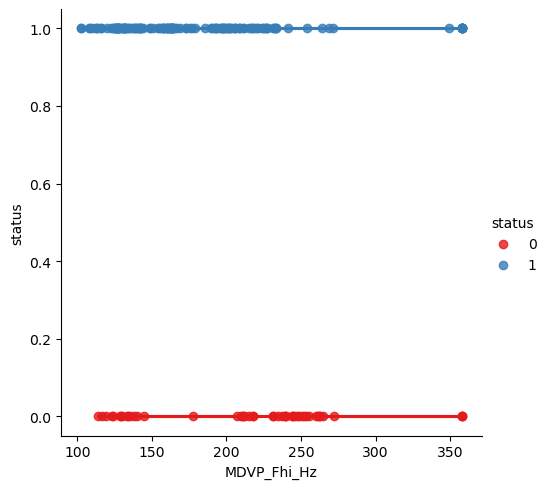

In [19]:
sns.lmplot(data=dt1, x = 'MDVP_Fhi_Hz', y='status', hue='status' ,palette='Set1')

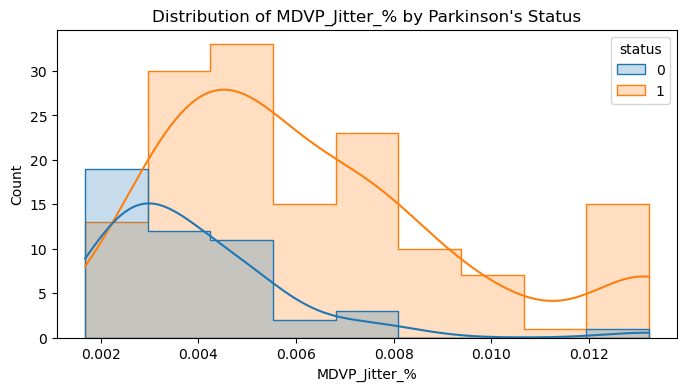

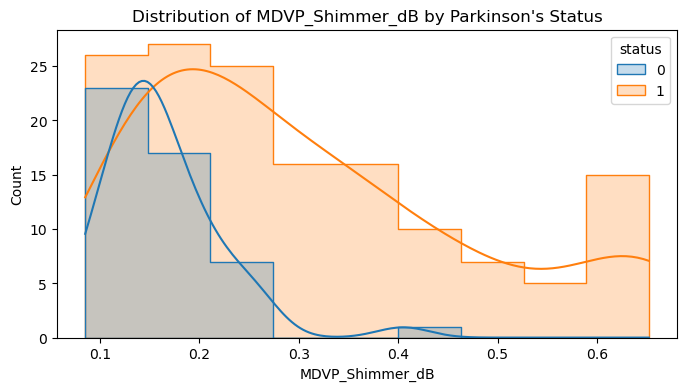

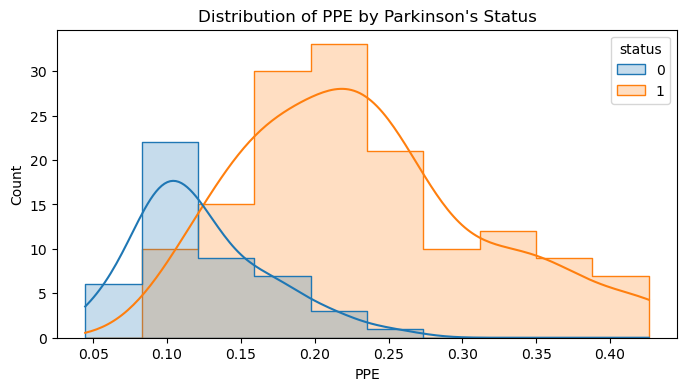

In [20]:
features = ['MDVP_Jitter_%', 'MDVP_Shimmer_dB', 'PPE']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=dt1, x=feature, hue="status", kde=True, element="step")
    plt.title(f"Distribution of {feature} by Parkinson's Status")
    plt.show()

C:\Users\rsing\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


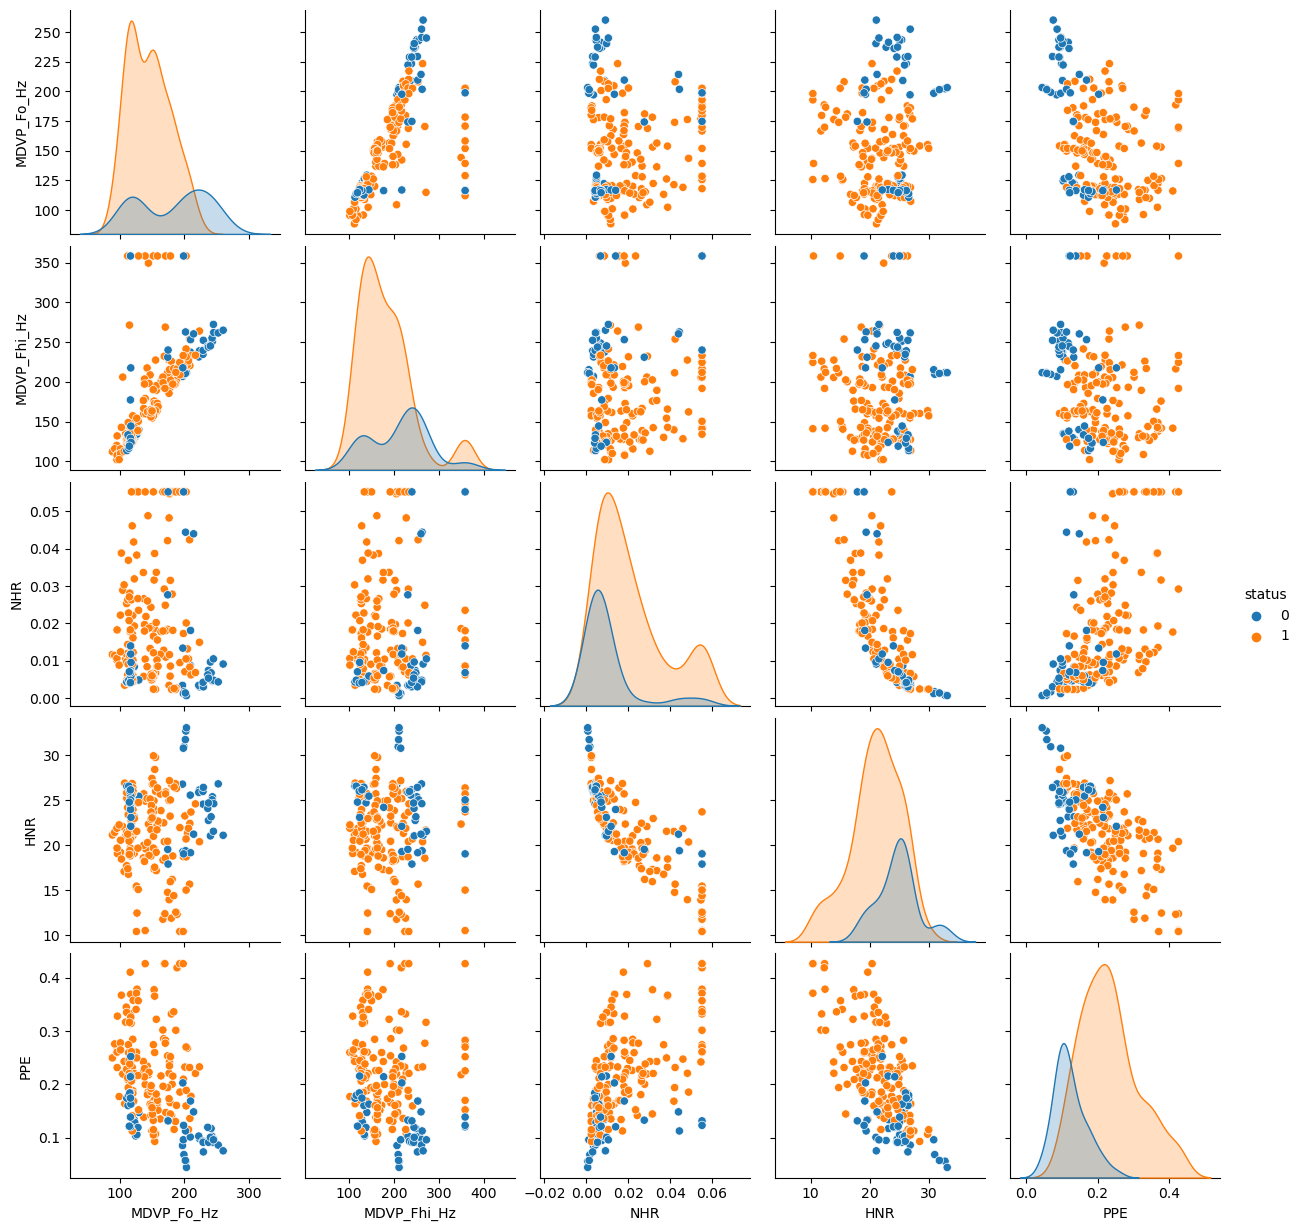

In [21]:
sns.pairplot(dt1[['MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'NHR', 'HNR', 'PPE', 'status']], hue="status")
plt.show()

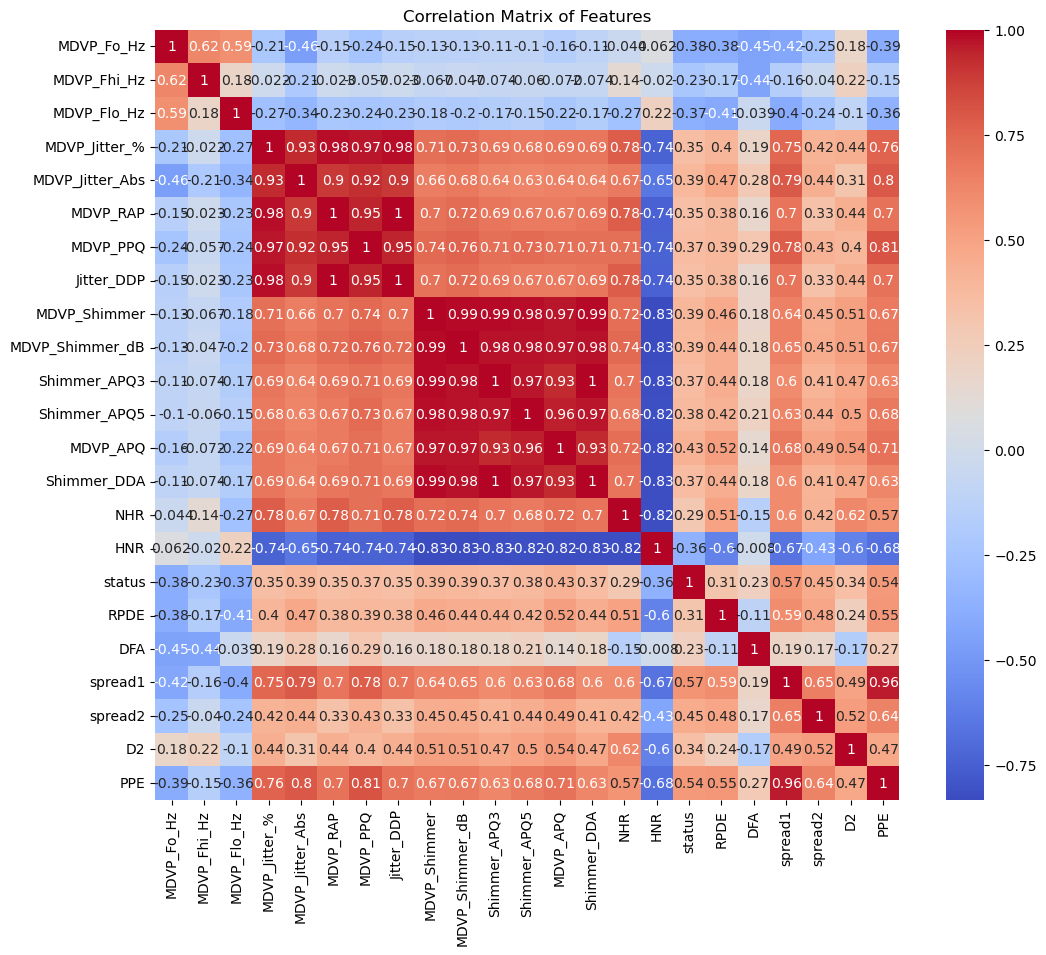

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(dt1.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

In [23]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MDVP_Fo_Hz       195 non-null    float64
 1   MDVP_Fhi_Hz      195 non-null    float64
 2   MDVP_Flo_Hz      195 non-null    float64
 3   MDVP_Jitter_%    195 non-null    float64
 4   MDVP_Jitter_Abs  195 non-null    float64
 5   MDVP_RAP         195 non-null    float64
 6   MDVP_PPQ         195 non-null    float64
 7   Jitter_DDP       195 non-null    float64
 8   MDVP_Shimmer     195 non-null    float64
 9   MDVP_Shimmer_dB  195 non-null    float64
 10  Shimmer_APQ3     195 non-null    float64
 11  Shimmer_APQ5     195 non-null    float64
 12  MDVP_APQ         195 non-null    float64
 13  Shimmer_DDA      195 non-null    float64
 14  NHR              195 non-null    float64
 15  HNR              195 non-null    float64
 16  status           195 non-null    int64  
 17  RPDE            

In [24]:
x=dt1.drop(columns=['status'],axis=1)
x

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_%,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.007840,0.00007,0.00370,0.005540,0.01109,0.04374,0.426,...,0.02971,0.06545,0.022110,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.009680,0.00008,0.00465,0.006960,0.01394,0.06134,0.626,...,0.04368,0.09403,0.019290,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.010500,0.00009,0.00544,0.007098,0.01633,0.05233,0.482,...,0.03590,0.08270,0.013090,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.009970,0.00009,0.00502,0.006980,0.01505,0.05492,0.517,...,0.03772,0.08771,0.013530,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.012840,0.00011,0.00655,0.007098,0.01966,0.06425,0.584,...,0.04465,0.10470,0.017670,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.004590,0.00003,0.00263,0.002590,0.00790,0.04087,0.405,...,0.02745,0.07008,0.027640,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.005640,0.00003,0.00331,0.002920,0.00994,0.02751,0.263,...,0.01879,0.04812,0.018100,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.013222,0.00008,0.00624,0.005640,0.01873,0.02308,0.256,...,0.01667,0.03804,0.055212,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,358.220,74.904,0.007400,0.00004,0.00370,0.003900,0.01109,0.02296,0.241,...,0.01588,0.03794,0.055212,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [25]:
y=dt1['status']
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y, test_size=0.2, random_state=2)

In [27]:
model=LogisticRegression()
model.fit(x_train, y_train)

C:\Users\rsing\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred=model.predict(x_test)
y_pred


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [29]:
model.score(x_test, y_test)

0.8461538461538461

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.87      0.93      0.90        29

    accuracy                           0.85        39
   macro avg       0.81      0.77      0.78        39
weighted avg       0.84      0.85      0.84        39



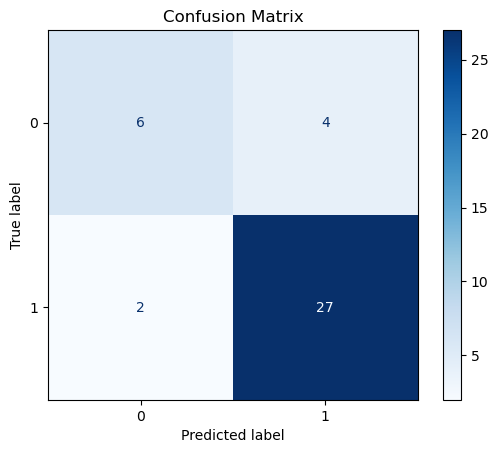

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print((6+27)/(6+4+2+27)*100)

84.61538461538461


In [33]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
from imblearn.combine import SMOTEENN

In [35]:
sm=SMOTEENN()
x_resampled,y_resampled=sm.fit_resample(x,y)

In [36]:
xl_train, xl_test, yl_train, yl_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

In [37]:
model_lg_sm=LogisticRegression()
model_lg_sm.fit(xl_train,yl_train)

C:\Users\rsing\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_lg_pred=model_lg_sm.predict(xl_test)
y_lg_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [39]:
print(classification_report(yl_test, y_lg_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        23
           1       0.81      0.91      0.86        23

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.85      0.85      0.85        46



In [40]:
model_lg_sm.score(xl_test,yl_test)

0.8478260869565217

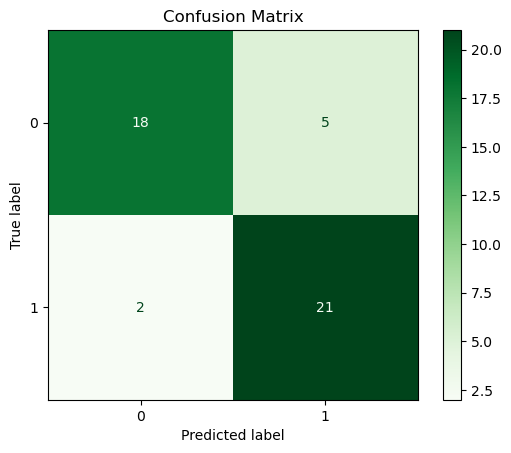

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(yl_test, y_lg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

In [42]:
print((19+18)/(18+4+6+19)*100)

78.72340425531915


In [43]:
model_dt=DecisionTreeClassifier(criterion='gini', random_state=2,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=2)

In [44]:
y_dt_pred=model_dt.predict(x_test)
y_dt_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [45]:
model_dt.score(x_test,y_test)

0.8205128205128205

In [46]:
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.89      0.86      0.88        29

    accuracy                           0.82        39
   macro avg       0.76      0.78      0.77        39
weighted avg       0.83      0.82      0.82        39



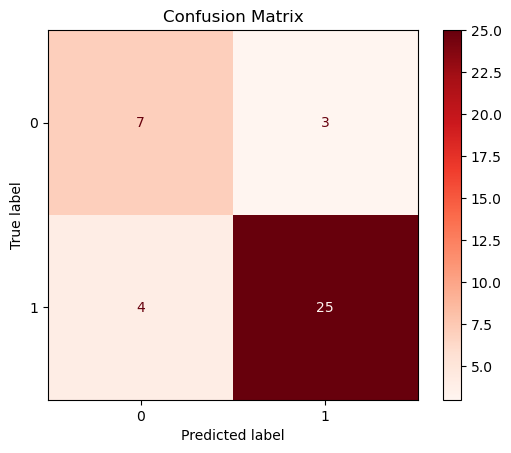

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

In [48]:
print((7+25)/(7+3+4+25)*100)

82.05128205128204


In [49]:
sm=SMOTEENN()
x_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [50]:
xdt_train, xdt_test, ydt_train, ydt_test = train_test_split(x_resampled1, y_resampled1, test_size=0.2)

In [51]:
model_dt_sm=DecisionTreeClassifier(criterion='gini', random_state=2, max_depth=6, min_samples_leaf=8)
model_dt_sm.fit(xdt_train, ydt_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=2)

In [52]:
y_dt_pred_sm=model_dt_sm.predict(xdt_test)
y_dt_pred_sm

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [53]:
model_dt_sm.score(xdt_test, ydt_test)

0.8863636363636364

In [54]:
print(classification_report(ydt_test, y_dt_pred_sm))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.92      0.88      0.90        25

    accuracy                           0.89        44
   macro avg       0.88      0.89      0.88        44
weighted avg       0.89      0.89      0.89        44



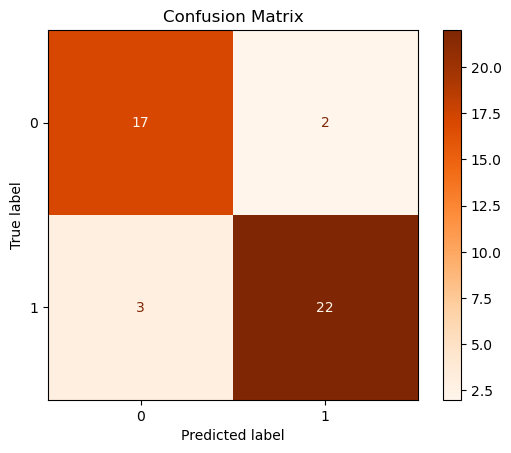

In [55]:
cm = confusion_matrix(ydt_test, y_dt_pred_sm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title('Confusion Matrix')
plt.show()

In [56]:
print((20+22)/(20+1+3+22)*100)

91.30434782608695


In [57]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini',random_state=2, max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=2)

In [58]:
y_rf_pred=model_rf.predict(x_test)
y_rf_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [59]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        29

    accuracy                           0.87        39
   macro avg       0.87      0.78      0.81        39
weighted avg       0.87      0.87      0.86        39



In [60]:
model_rf.score(x_test, y_test)

0.8717948717948718

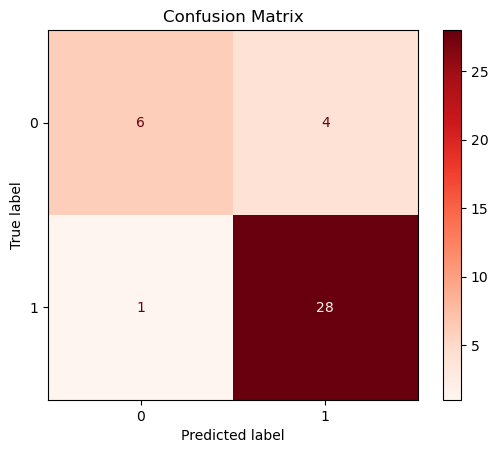

In [61]:
cm=confusion_matrix(y_test, y_rf_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

In [62]:
print((6+28)/(6+4+1+28)*100)

87.17948717948718


In [63]:
sm=SMOTEENN()
x_resampled2, y_resampled2 = sm.fit_resample(x,y)

In [64]:
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(x_resampled2, y_resampled2, test_size=0.2) 

In [65]:
model_rf_sm=RandomForestClassifier(n_estimators=100, criterion='gini', random_state=2,max_depth=6, min_samples_leaf=8)
model_rf_sm.fit(xrf_train, yrf_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=2)

In [66]:
y_rf_pred_sm=model_rf_sm.predict(xrf_test)
y_rf_pred_sm

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [67]:
model_rf_sm.score(xrf_test, yrf_test)

0.9347826086956522

In [68]:
print(classification_report(yrf_test, y_rf_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.95      0.90      0.92        20

    accuracy                           0.93        46
   macro avg       0.94      0.93      0.93        46
weighted avg       0.94      0.93      0.93        46



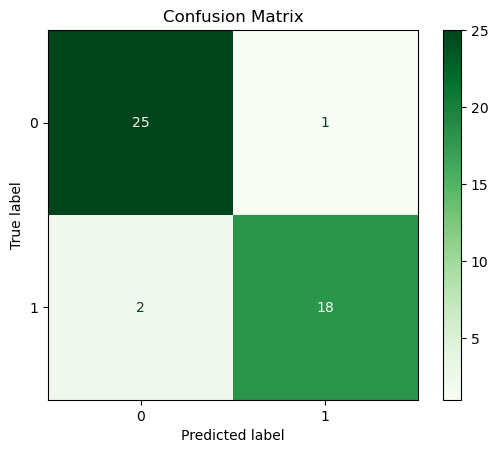

In [69]:
cm=confusion_matrix(yrf_test, y_rf_pred_sm)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

In [70]:
print((23+18)/(23+4+2+18)*100)

87.2340425531915


Decision Tree model is more accurate compare to other models. so finalize DT Classifier, and save the model so that we can use it in a later stage

In [73]:
import pickle

filename = 'Parkinsons1.sav'

pickle.dump(model_dt_sm, open(filename, 'wb'))

load_model = pickle.load(open(filename, 'rb'))

model_dt_score = load_model.score(xdt_test, ydt_test)

model_dt_score

0.8863636363636364